<a href="https://colab.research.google.com/github/saqibkaka/PRODIGY_DS_TASK/blob/main/PRODIGY_DS_TASK_03/Bank_Marketing_Dataset_Analysis_with_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


# Load and Explore Dataset

In [86]:
# Load dataset
data = '/content/bank.csv'
df = pd.read_csv(data)

# Initial exploration
print(df.head(5))
print(df.info())
print(df.describe())
print("Shape of the dataset:", df.shape)
print("Column names:", df.columns)


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 

# Handle Missing Values and Duplicates

In [87]:
# Check for missing values and duplicates
print("Missing values:\n", df.isnull().sum())
print("Number of duplicate rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64
Number of duplicate rows: 0
Shape after removing duplicates: (11162, 17)


# Visualize Distribution and Handle Outliers

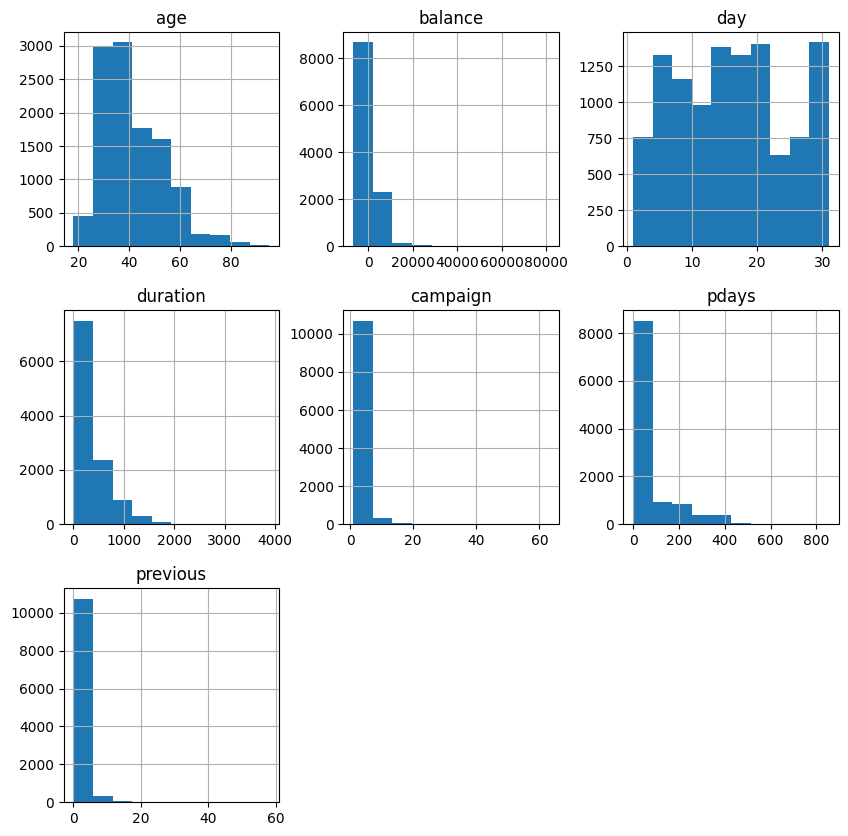

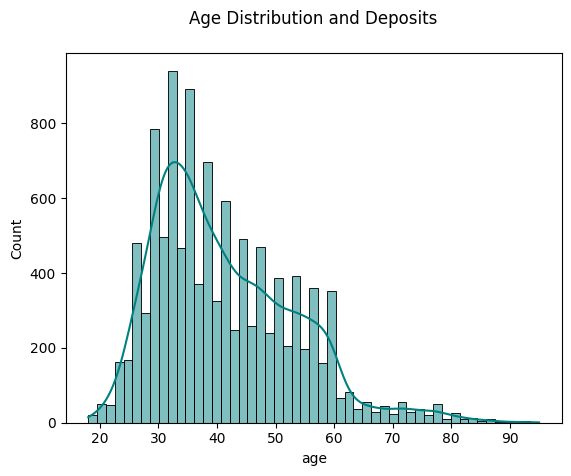

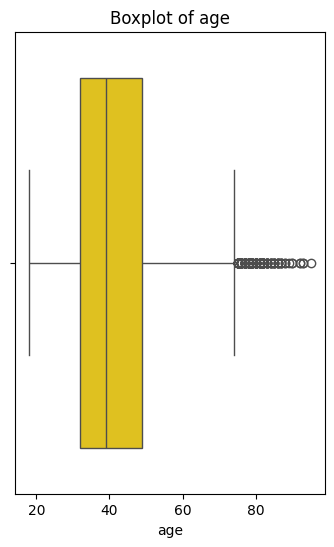

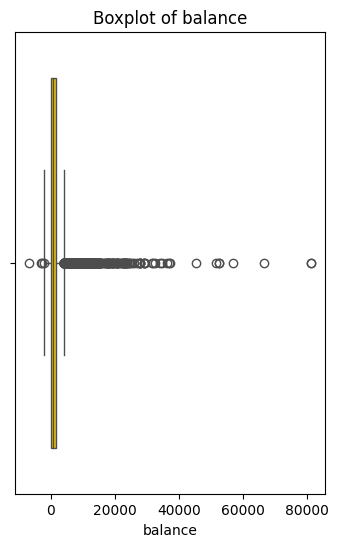

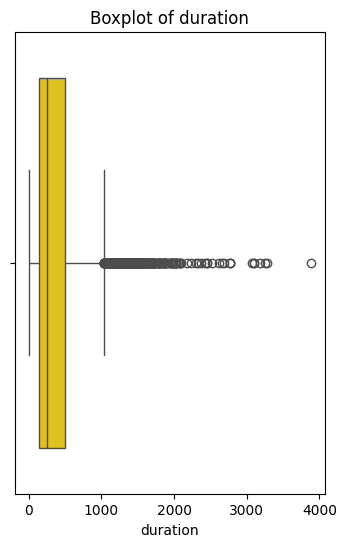

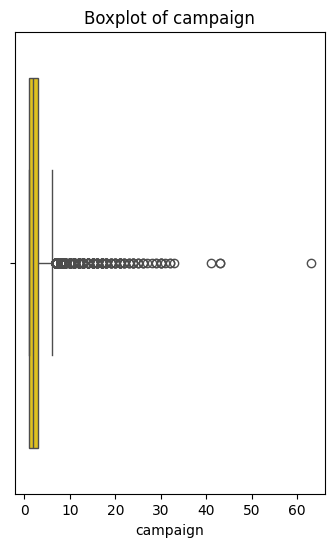

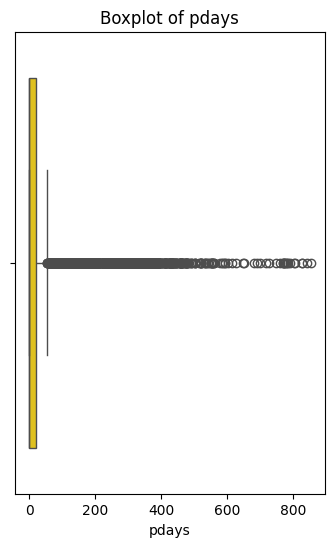

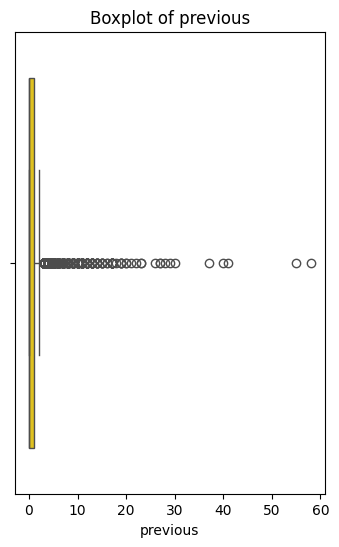

Original dataset shape: (11162, 17)
Cleaned dataset shape: (6557, 17)


In [88]:
# Histograms of numeric columns
df.hist(figsize=(10, 10))
plt.show()

# Age distribution with KDE
sns.histplot(x="age", data=df, kde=True, color='teal')
plt.title("Age Distribution and Deposits\n")
plt.show()

# Boxplots for outlier detection
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for feature in num_cols:
    plt.figure(figsize=(4, 6))
    sns.boxplot(x=feature, data=df, color='gold')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

# Remove outliers using IQR method
def remove_outliers(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

# Clean dataset by removing outliers
cleaned_data = remove_outliers(df, num_cols)
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", cleaned_data.shape)


# Encode Categorical Columns

In [89]:
# Drop unnecessary columns
df = df.drop(columns=['poutcome', 'contact', 'previous', 'pdays', 'duration', 'month', 'day'])

# Encode categorical columns
df_object = df.select_dtypes(include=["object"])
le = LabelEncoder()
for column in df_object:
    df[column] = le.fit_transform(df[column])


# Correlation Matrix

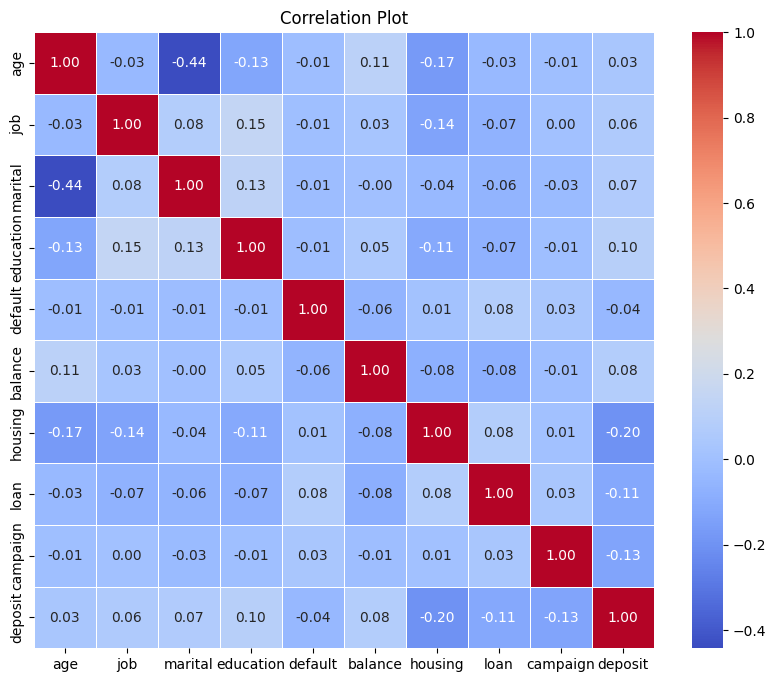

In [90]:
# Correlation matrix and heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()


# Train-Test Split

In [91]:
# Define features and target variable
x = df.drop(['deposit'], axis=1)
y = df['deposit']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Decision Tree Classifier

Training Accuracy: 99.59681935267108%
Testing Accuracy: 60.32243618450514%
Training Accuracy (depth=5): 64.766491208422%
Testing Accuracy (depth=5): 65.8307210031348%


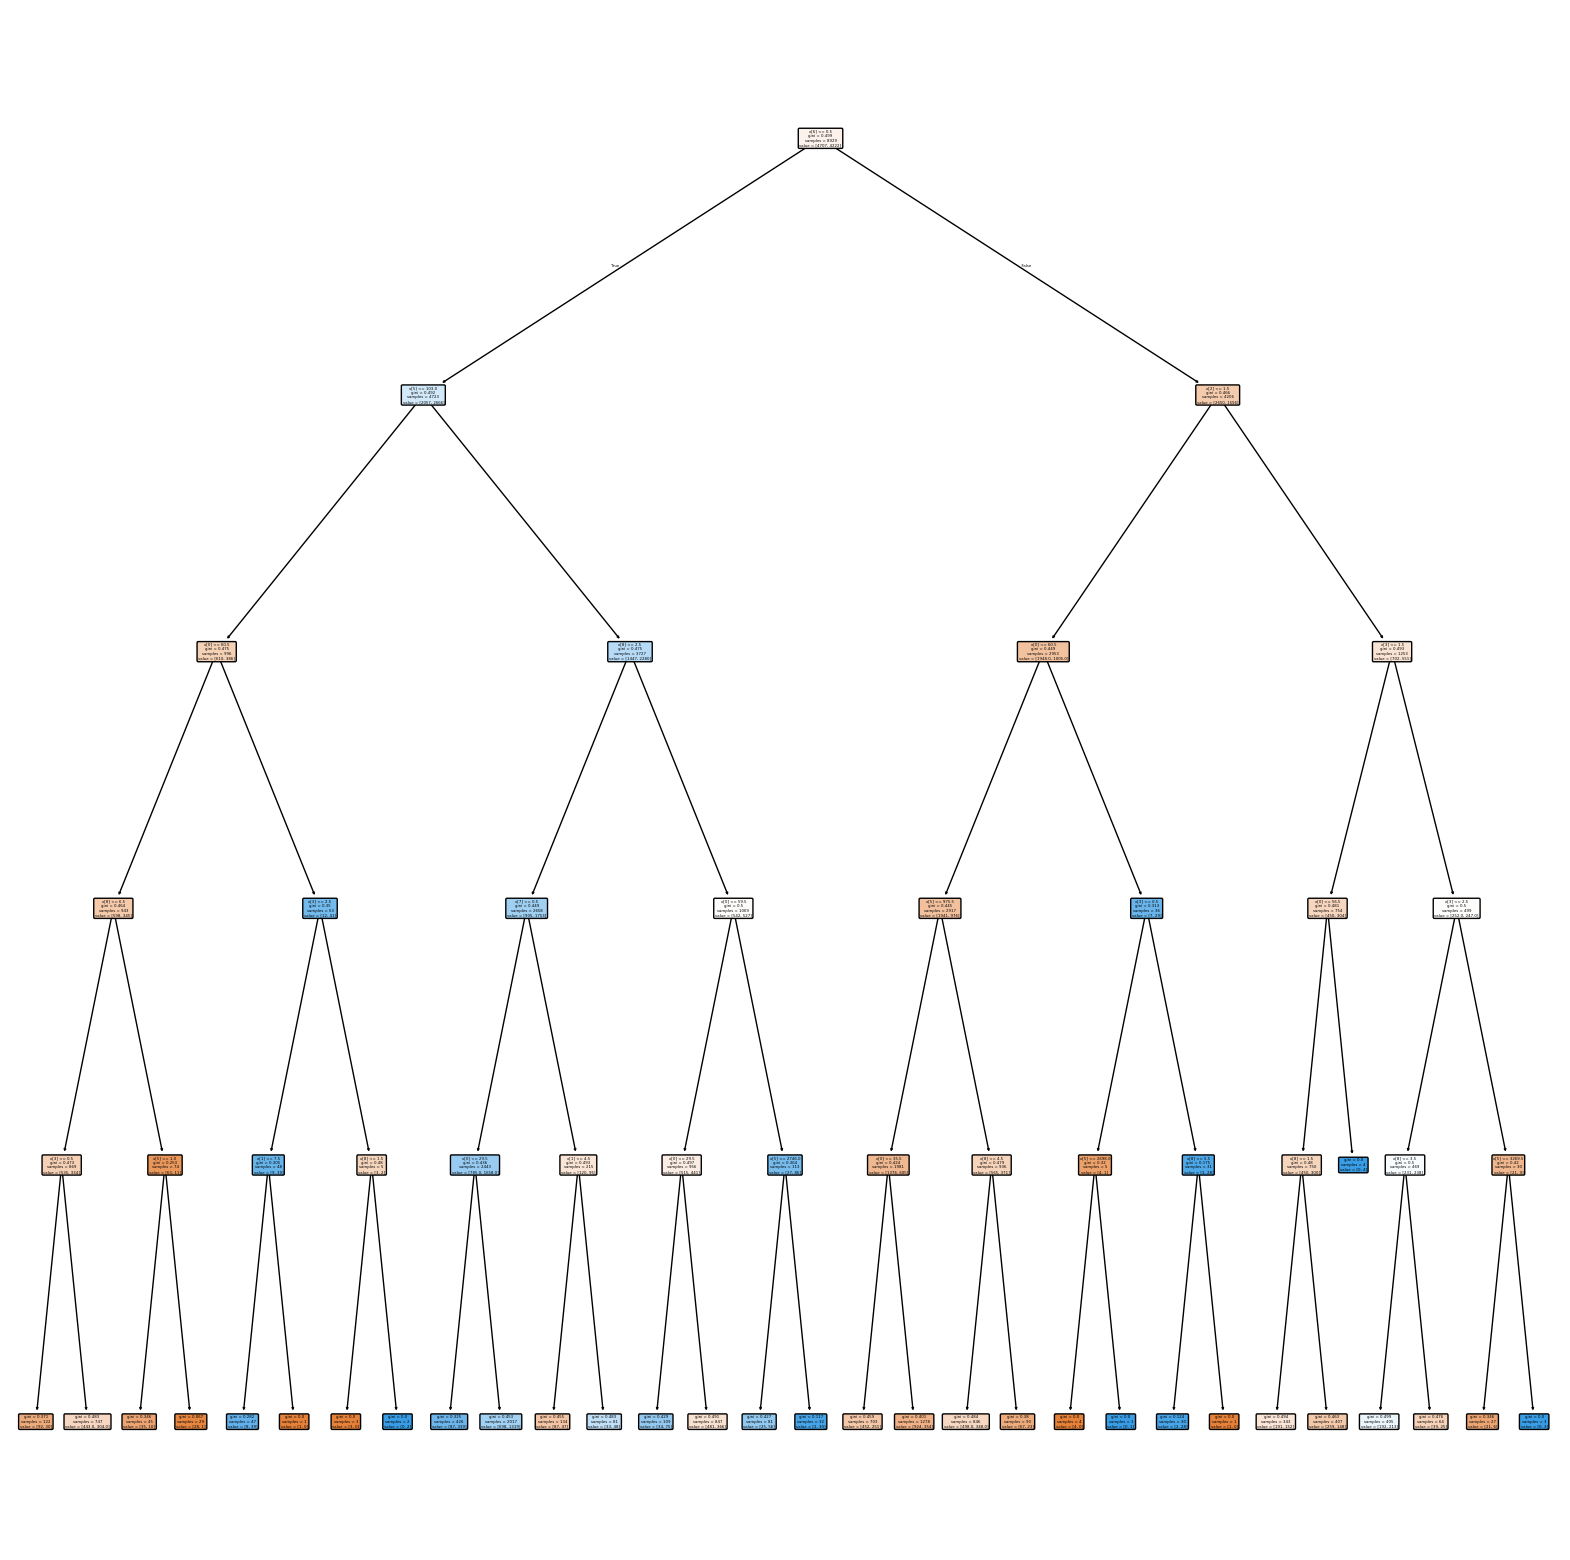

In [92]:
# Model training with Decision Tree
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train, y_train)

# Model accuracy
train_accuracy = dt.score(x_train, y_train) * 100
test_accuracy = dt.score(x_test, y_test) * 100
print(f"Training Accuracy: {train_accuracy}%")
print(f"Testing Accuracy: {test_accuracy}%")

# Decision Tree with max depth
dt2 = DecisionTreeClassifier(max_depth=5)
dt2.fit(x_train, y_train)
train_accuracy_depth5 = dt2.score(x_train, y_train) * 100
test_accuracy_depth5 = dt2.score(x_test, y_test) * 100
print(f"Training Accuracy (depth=5): {train_accuracy_depth5}%")
print(f"Testing Accuracy (depth=5): {test_accuracy_depth5}%")

# Visualize Decision Tree
plt.figure(figsize=(20, 20))
plot_tree(dt2, filled=True, rounded=True)
plt.show()


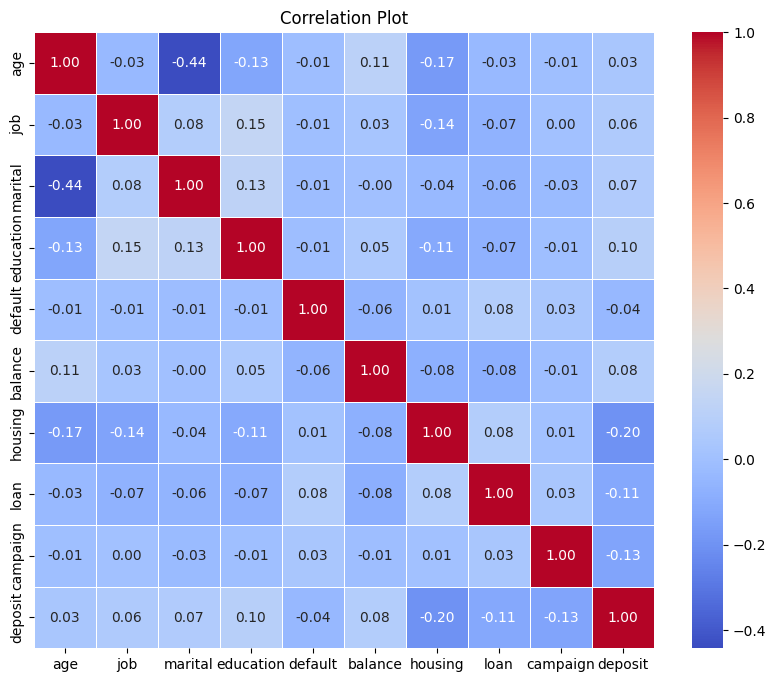

In [93]:
# Correlation matrix and heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()
